<a href="https://colab.research.google.com/github/2025-01-sookmyung-opensource/final_project/blob/pre-yoon/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 프로젝트 요약

In [ ]:
## test2 : "시각장애인을 위한 물체 인식 안내 시스템 만들기"
# 상세 : 오픈소스 컴퓨터 비전 모델(YOLOv5)을 활용하여, 시각장애인이 길거리에서 흔히 마주치는 장애물/물체를 실시간으로 인식하고 음성으로 안내해 주는 시스템을 만드는 프로젝트

# 순서
# 1. 카메라에서 실시간 영상 입력
# 2. YOLOv5 모델로 물체 인식
# 3. 인식된 물체를 음성으로 변환하여 사용자에게 안내

1. 데이터 생성 : Roboflow (추후 직접 찍은 사진들로 교체해도 좋을듯!)

In [ ]:
#1. https://universe.roboflow.com 에서 데이터를 검색한다. (현재 : crosswalk)

#2. 원하는 데이터셋을 fork 한다.

#3. https://app.roboflow.com 로 이동해서 fork 한 프로젝트로 진입한다.

#4. 우측 상단에 “Download Dataset” 버튼을 누르고, Format : YOLOv5 PyTorch 를 설정한뒤 Show download code 를 선택해서 데이터를 다운받는다.

2. YOLOv5 설치 및 환경 설정

In [ ]:
# YOLOv5 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17478, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 17478 (delta 80), reused 37 (delta 32), pack-reused 17358 (from 2)
Receiving objects: 100% (17478/17478), 16.31 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (11980/11980), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/

3. 데이터셋 불러오기

In [ ]:
# Roboflow에서 제공한 코드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="") # 보안상의 문제로 비워서 깃에 커밋함.
project = rf.workspace("yoon-pvmwt").project("traffic-signals-wxmow-2xnpw")
version = project.version(1)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 133.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Signals-1 in yolov5pytorch:: 100%|██████████| 2508/2508 [00:00<00:00, 9610.16it/s]


4. YOLOv5 모델 학습

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  with torch.cuda.amp.autocast(amp):
       3/49      4.73G    0.05844     0.0169    0.05631         29        640:  57% 29/51 [00:08<00:06,  3.32it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/49      4.73G    0.05859      0.017    0.05611         39        640:  59% 30/51 [00:08<00:06,  3.42it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/49      4.73G    0.05899    0.01697    0.05587         33        640:  61% 31/51 [00:08<00:05,  3.75it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/49    

5. 학습전후 모델들의 테스트 비교

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Traffic-Signals-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
image 1/212 /content/yolov5/Traffic-Signals-1/test/images/BA-10-_jpg.rf.f3522ab3153478e01087dd1e5801ba65.jpg: 576x640 1 Barrier Ahead, 29.7ms
image 2/212 /content/yolov5/Traffic-Signals-1/test/images/BA-11-_png.rf.aff74dddc453738087f7df5d8be340c3.jpg: 640x640 1 Barrier Ahead, 11.8ms
imag

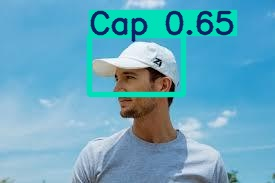

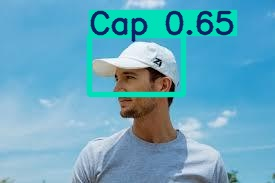

In [ ]:
# 학습한 YOLOv5 모델(best.pt)을 사용하여 테스트 이미지 분석
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source {dataset.location}/test/images

# YOLOv5 사전 학습된 모델로 테스트 (YOLOv5 small)
!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source {dataset.location}/test/images


# 결과 이미지 표시
from IPython.display import Image, display
import os

# 결과 이미지가 저장된 경로
result_path_1 = "runs/detect/exp"  # 학습한 모델 결과
result_path_2 = "runs/detect/exp2"  # 사전 학습된 모델 결과

# 첫 번째 결과 이미지 (학습한 모델)
files_1 = os.listdir(result_path_1)

# 두 번째 결과 이미지 (사전 학습된 모델)
files_2 = os.listdir(result_path_2)

# 첫 3개의 결과 이미지 표시
for file_1, file_2 in zip(files_1[:4], files_2[:4]):  # 첫 3개 이미지만 표시
    if file_1.endswith(".jpg") or file_1.endswith(".png"):
        display(Image(filename=os.path.join(result_path_1, file_1)), display_id="left")
        display(Image(filename=os.path.join(result_path_2, file_2)), display_id="right")

현재 결과 ==> 두 모델이 같은 결과를 보임
( 예상 : 학습시킨 교통표지판이 아니라 다른 이미지들에 대한 비교라서 그런듯..? )

6. 학습시킨 것과 유사한 이미지로 다시 모델 비교

Saving 신호등.png to 신호등.png
detect: weights=['runs/train/exp/weights/best.pt'], source=uploaded_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=result_best, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/yolov5/uploaded_images/신호등.png: 384x640 (no detections), 30.0ms
Speed: 0.5ms pre-process, 30.0ms inference, 44.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/result_best
detect: weights=['yolov5s.pt'], source=uploaded_images, data=data/coco

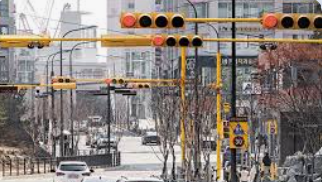

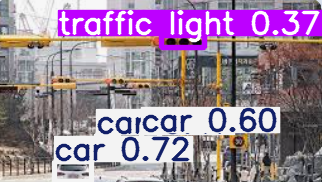

In [ ]:
from google.colab import files
uploaded = files.upload()

import os

# 신호등 이미지 업로드 (학습데이터와 유사함)
uploaded_files = list(uploaded.keys())
input_images = "uploaded_images"
os.makedirs(input_images, exist_ok=True)

# 업로드한 파일을 YOLO에 사용할 디렉토리로 이동
for filename in uploaded_files:
    os.rename(filename, os.path.join(input_images, filename))


# 학습된 모델과 사전 학습된 모델 각각 실행
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_best \
  --exist-ok

!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_yolov5s \
  --exist-ok


# 결과 표시
from IPython.display import Image, display

result_best_path = "runs/detect/result_best"
result_yolo_path = "runs/detect/result_yolov5s"

result_best_files = os.listdir(result_best_path)
result_yolo_files = os.listdir(result_yolo_path)

# 같은 이름의 파일이 존재한다고 가정하고 비교 표시
for file in result_best_files:
    if file.endswith(".jpg") or file.endswith(".png"):
        display(Image(filename=os.path.join(result_best_path, file)))
        display(Image(filename=os.path.join(result_yolo_path, file)))

비교 결과 ==> **커스텀 모델 (best.pt)**은 신호등(traffic light)을 어느 정도 감지할 수 있으나, 정확도(0.37)가 낮음.

YOLOv5s는 신호등을 전혀 감지하지 못하고, **차량(car)**은 더 잘 감지함.

이는 커스텀 모델이 신호등에 특화된 학습이 진행되었다는 것을 의미함.

즉, 어느 정도 학습에 성공했으나 아직은 부족한 점이 많음!!

---여기부터---

6. 실시간 웹캠 영상 처리 (OpenCV 사용)

In [ ]:
import torch
import cv2

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt')

cap = cv2.VideoCapture(0)  # 웹캠 사용

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    # 결과 시각화
    results.print()
    img = results.render()[0]
    cv2.imshow('YOLOv5 Real-Time', img)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

7. 인식된 물체를 음성으로 안내 (TTS)

In [ ]:
from gtts import gTTS
import os

# 감지된 객체 이름 리스트
labels = results.names
detected = results.pandas().xyxy[0]['name'].tolist()
if detected:
    text = f"{detected[0]} 앞에 있습니다."  # 예: "crosswalk 앞에 있습니다."
    tts = gTTS(text=text, lang='ko')
    tts.save("alert.mp3")
    os.system("mpg123 alert.mp3")  # Linux/macOS용